In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\suhas\\Documents\\College Projects\\Leaf-Classification-Medicinal\\features.csv")

In [3]:
del df['Unnamed: 0']
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,sorbus aucuparia,175.413117,89.902019,158.223090,118.536284,170.705951,95.692209,2547445.0,18921.339434,3097.903076,1620.005981,1.912279,0.089415,1.970061,4.010535,75.356344,0.995952,9.438853,0.388849
1,sorbus aucuparia,196.430216,79.807680,178.019189,109.838586,192.480699,81.049172,1634514.5,18703.955534,2757.824219,1387.480957,1.987648,0.058713,2.341018,4.512082,57.308815,0.995926,8.980168,0.429019
2,sorbus aucuparia,190.371075,84.645586,175.592140,112.242956,188.752081,85.362662,1738368.0,21407.024849,2702.096924,1579.382568,1.710856,0.047669,2.454972,4.999913,58.240379,0.996254,8.807776,0.435627
3,sorbus aucuparia,185.160308,83.099103,168.328031,111.148373,183.505444,83.465672,2084601.5,19003.685544,1576.593994,2721.065674,0.579403,0.072537,2.057955,4.421868,51.238502,0.996575,9.040451,0.432259
4,sorbus aucuparia,194.484634,76.452251,172.844500,108.608852,194.585816,74.933301,2282467.5,16497.088441,1693.006958,2685.539795,0.630416,0.105390,1.991983,3.767709,56.014063,0.995524,9.293541,0.442648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,yew plum pie,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850830,0.997820,1.460217,0.930480
6060,yew plum pie,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065629,0.997148,1.880480,0.906011
6061,yew plum pie,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593927,0.997296,1.357991,0.935189
6062,yew plum pie,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928906,0.997143,1.145095,0.946968


### Pre-processing

In [4]:
le = LabelEncoder()

In [5]:
col = []

for c in df.columns:
    col.append(c)
    
y = df[col[0]]
X = df[col[1:]]

In [6]:
scaler = StandardScaler()

In [7]:
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,sorbus aucuparia,175.413117,89.902019,158.223090,118.536284,170.705951,95.692209,2547445.0,18921.339434,3097.903076,1620.005981,1.912279,0.089415,1.970061,4.010535,75.356344,0.995952,9.438853,0.388849
1,sorbus aucuparia,196.430216,79.807680,178.019189,109.838586,192.480699,81.049172,1634514.5,18703.955534,2757.824219,1387.480957,1.987648,0.058713,2.341018,4.512082,57.308815,0.995926,8.980168,0.429019
2,sorbus aucuparia,190.371075,84.645586,175.592140,112.242956,188.752081,85.362662,1738368.0,21407.024849,2702.096924,1579.382568,1.710856,0.047669,2.454972,4.999913,58.240379,0.996254,8.807776,0.435627
3,sorbus aucuparia,185.160308,83.099103,168.328031,111.148373,183.505444,83.465672,2084601.5,19003.685544,1576.593994,2721.065674,0.579403,0.072537,2.057955,4.421868,51.238502,0.996575,9.040451,0.432259
4,sorbus aucuparia,194.484634,76.452251,172.844500,108.608852,194.585816,74.933301,2282467.5,16497.088441,1693.006958,2685.539795,0.630416,0.105390,1.991983,3.767709,56.014063,0.995524,9.293541,0.442648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,yew plum pie,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850830,0.997820,1.460217,0.930480
6060,yew plum pie,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065629,0.997148,1.880480,0.906011
6061,yew plum pie,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593927,0.997296,1.357991,0.935189
6062,yew plum pie,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928906,0.997143,1.145095,0.946968


In [8]:
le.fit(y)
species = le.classes_

In [9]:
df['common name'] = le.transform(y)
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,35,175.413117,89.902019,158.223090,118.536284,170.705951,95.692209,2547445.0,18921.339434,3097.903076,1620.005981,1.912279,0.089415,1.970061,4.010535,75.356344,0.995952,9.438853,0.388849
1,35,196.430216,79.807680,178.019189,109.838586,192.480699,81.049172,1634514.5,18703.955534,2757.824219,1387.480957,1.987648,0.058713,2.341018,4.512082,57.308815,0.995926,8.980168,0.429019
2,35,190.371075,84.645586,175.592140,112.242956,188.752081,85.362662,1738368.0,21407.024849,2702.096924,1579.382568,1.710856,0.047669,2.454972,4.999913,58.240379,0.996254,8.807776,0.435627
3,35,185.160308,83.099103,168.328031,111.148373,183.505444,83.465672,2084601.5,19003.685544,1576.593994,2721.065674,0.579403,0.072537,2.057955,4.421868,51.238502,0.996575,9.040451,0.432259
4,35,194.484634,76.452251,172.844500,108.608852,194.585816,74.933301,2282467.5,16497.088441,1693.006958,2685.539795,0.630416,0.105390,1.991983,3.767709,56.014063,0.995524,9.293541,0.442648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,46,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850830,0.997820,1.460217,0.930480
6060,46,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065629,0.997148,1.880480,0.906011
6061,46,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593927,0.997296,1.357991,0.935189
6062,46,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928906,0.997143,1.145095,0.946968


In [11]:
len(df['common name'].unique())

47

### Splitting into Train and Test

In [13]:
col = []

for c in df.columns:
    col.append(c)

y_fin = df[col[0]]
X_fin= df[col[1:]]
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin, stratify=y_fin, random_state = 1)

In [14]:
X_train

,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
2028,186.169055,83.589574,170.455935,102.611721,210.197164,54.801274,775992.0,4002.796360,1423.167480,829.220947,1.716271,0.608611,1.520789,1.777134,9.516306,0.998994,4.956736,0.721638
3416,180.152039,86.285683,163.476495,109.602194,174.932766,88.906883,756242.0,4055.084807,958.688782,1248.151245,0.768087,0.577924,1.582283,1.837507,73.981128,0.995478,9.350257,0.388671
2090,188.795089,75.069058,178.868370,86.506571,232.039639,26.795314,836601.5,4056.234959,1567.727417,799.392761,1.961148,0.638973,1.498001,1.713574,3.694805,0.999192,4.707211,0.764073
15,187.501084,83.417351,168.469243,113.292059,185.711019,82.915687,2194322.0,22465.696860,2915.001953,1642.464844,1.774773,0.054635,2.181899,4.929426,59.367043,0.996030,9.247282,0.422657
21,180.524664,87.626653,162.789994,115.747996,179.721923,86.116939,2534149.0,19913.343610,3007.785156,1747.258423,1.721431,0.080307,2.073824,4.187836,54.035481,0.996656,9.315436,0.420129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5687,164.147513,114.582533,160.237229,117.864683,189.148136,84.617834,766700.5,4087.317343,1742.100342,637.445740,2.732939,0.576712,1.448407,1.717688,106.695204,0.994347,5.919816,0.669341
1308,182.699478,94.431028,168.086297,111.419101,216.857701,48.879607,677210.0,3731.825798,844.017334,1232.530762,0.684784,0.611069,1.536122,1.797129,52.914583,0.994478,5.585332,0.676983
4653,186.632463,88.788157,180.326744,96.669886,212.753347,55.289595,714233.0,3349.222766,958.739807,986.283813,0.972073,0.800132,1.323923,1.721945,19.981081,0.997956,4.988795,0.694364
3190,183.189605,85.652786,165.438741,110.743137,175.843082,90.901870,873258.5,4674.882585,1109.338501,1073.803711,1.033092,0.502124,1.364100,2.141355,55.502175,0.996689,9.234909,0.403593


In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [16]:
X_train

array([[-0.35172556,  0.16610744, -0.38911767, ...,  1.34135289,
        -0.46719974,  0.55992298],
       [-0.63739317,  0.36373186, -0.65534356, ..., -0.44281869,
         1.23139564, -1.27084866],
       [-0.22705032, -0.45844496, -0.0682312 , ...,  1.44175498,
        -0.56366944,  0.79324255],
       ...,
       [-0.32972453,  0.54716278, -0.01260253, ...,  0.81474774,
        -0.45480536,  0.40995838],
       [-0.49317976,  0.31734055, -0.58049503, ...,  0.17178736,
         1.18680051, -1.18880383],
       [-0.80060765, -0.19982917, -1.11960996, ...,  0.80251395,
        -0.0056377 , -0.01177111]])

### Create SVM and Optimise

In [17]:
clf = SVC()

In [18]:
params = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.05, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0.01, 0.1, 1, 5, 10, 100], 'degree': [1, 2, 3, 4, 5, 6]}

In [19]:
clf.fit(X_train, y_train)

SVC()

In [21]:
clf.score(X_test, y_test)

0.9030343007915568

In [22]:
gsc = GridSearchCV(clf, param_grid=params, n_jobs=-1)

In [23]:
grid_result = gsc.fit(X_train, y_train)

In [24]:
best_params = grid_result.best_params_
best_params

{'C': 10, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}

In [25]:
grid_result.best_score_

0.9700944160350101

In [26]:
clf = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability = True, degree=best_params['degree'])
clf

SVC(C=10, degree=1, gamma=100, kernel='poly', probability=True)

In [25]:
#clf.fit(X_train, y_train)

In [26]:
#clf.score(X_test, y_test)

### Learning Curve

In [27]:
X_fin = scaler.fit_transform(X_fin)

In [28]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_fin, y_fin, shuffle=True)

In [29]:
train_scores_mean = train_scores.mean(axis = 1)
train_scores_mean

array([1.        , 0.9998731 , 0.99932534, 0.99882948, 0.99868068])

In [30]:
test_scores_mean = test_scores.mean(axis = 1)
test_scores_mean

array([0.81810624, 0.92381244, 0.95646394, 0.98004634, 0.99835065])

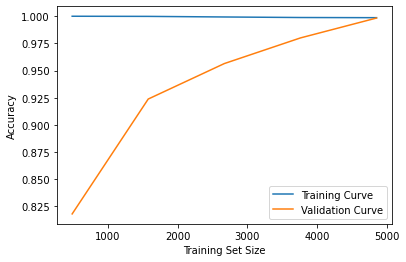

In [37]:
plt.plot(train_sizes, train_scores_mean, label='Training Curve')
plt.plot(train_sizes, test_scores_mean, label = 'Validation Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
clf.fit(X_fin, y_fin)

SVC(C=10, degree=1, gamma=100, kernel='poly', probability=True)

In [34]:
clf.score(X_test, y_test)

0.9953825857519789

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        25
           6       0.94      1.00      0.97        33
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        26
           9       0.93      0.93      0.93        28
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        38
          17       1.00    